# Исследование данных авиакомпании. <br> Проверка гипотезы о повышении спроса во время фестивалей

## Описание проекта

В распоряжении имеется файлы, в которых содержатся результаты запросов со следующей синформацией.
- 1 датафрейм - количество полетов в разрезе моделей самолета;
- 2 датафрейм- количество полетов в разрезе города прибытия рейса;

### Цель исследования

Изучение и анализ базы данных в разрезе городов прибытия и моделей самолета.

### План исследования

- [Изучение / предобработка данных](#section_1)
- [ТОП-10 популярных направлений в России](#section_2)
- [Количество рейсов в разрезе модели самолета](#section_3)
- [Количесвто перелетов по всем городам России](#section_4)

### Изучение / предобработка данных <a id='section_1'></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Прочитаем файлы из созданных ранее запросов

In [2]:
aircrafts = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

In [3]:
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Отсортируем датафрейм с количеством перелетов в разрезе моделей самолетов для наглядности при построении графика

In [4]:
aircrafts = aircrafts.sort_values(by='flights_amount', ascending=False).reset_index(drop=True)

Проверим наличие пропусков, типы данных и статистические показатели

In [5]:
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
aircrafts.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Изучим данные по количеству перелетов в разрезе городов, принимающих рейсы

In [7]:
city_flights.sample(5)

,city,average_flights
20,Екатеринбург,11.322581
43,Москва,129.774194
81,Тюмень,6.967742
51,Нижнекамск,3.741935
49,Нефтеюганск,1.000000


Проверим наличие пропусков, типы данных, наличие будликатов и статистические показатели

In [8]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
city_flights.city.duplicated().sum()

0

In [10]:
city_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


### Вывод

На этапе изучения данных пропусков, нулевых значений, дубликатов не обнаружено. 
Типы данных корректны и пригодны для дальнейшей работы с ними.
Аномальные значения отсутсвуют. 
На данном этапе количественные значения выглядят логичными и не вызывают вопросов в плане достоверности информации.

## ТОП-10 популярных направлений в России <a id='section_2'></a>

Cформируем данные для сопоставления количества принятых рейсов по всем имеющимся городам.

Создадим отдельный фрейм с ТОП-10 городов по среднему количеству принятых рейсов.

In [11]:

flights_cities = city_flights.\
                      sort_values(by='average_flights').\
                      reset_index(drop=True)

top10_flight_cities = city_flights.\
                      sort_values(by='average_flights', ascending=False).\
                      head(10).reset_index(drop=True)

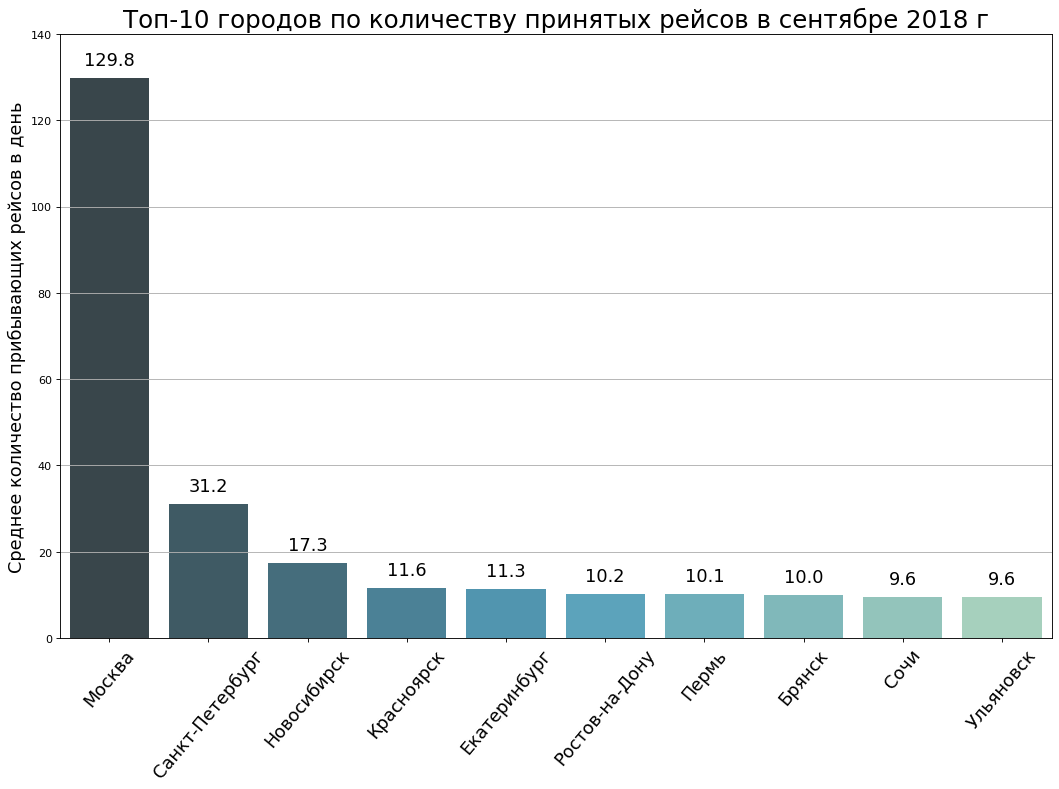

In [12]:
# создание фигуры и сам график
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
sns.barplot(x=top10_flight_cities.index, y=top10_flight_cities.average_flights, data=top10_flight_cities, palette= "GnBu_d")

# оформление графика
ax.set_title('Топ-10 городов по количеству принятых рейсов в сентябре 2018 г', fontsize=22)
ax.set_xticklabels(top10_flight_cities.city, rotation=50, fontsize=16)
ax.set_ylabel('Среднее количество прибывающих рейсов в день', fontsize=16)
ax.set_xlabel('', fontsize=16)
ax.set_ylim(0,140)
ax.grid(axis='y')

# подписи значений
for row in top10_flight_cities.itertuples():
    ax.text(row.Index, row.average_flights+2, s=round(row.average_flights, 1), 
            horizontalalignment= 'center', verticalalignment='bottom', fontsize=16)

### Вывод

Ситуация с количеством принятых рейсов наглаядно демонстрирует статус города Москвы, как крупнейшего транспортного хаба на уровне внутренних и внешинх перелетов.

Ситуация выглядит закономерной с учетом количества превосходства столицы и по количеству аэропортов по сравнению с другими регионами. Вторым крупнейшим узлом прогнозируемо является Санкт-Петербург. Замыкает тройку наболее самых востребованных аэропортов России Новосибирск.

Оставшиеся в ТОП-10 городов по количеству принятых рейсов не отличаются высокой волатильностью и разница между ними составляет порядка 1-2 принятых рейсов в месяц.

Следует отметить, что вошедшие в ТОП-10 города представляют разные географические части России и примерно равномерно рассредоточены, если судить по их географическому положению. 

## Количество рейсов в разрезе модели самолета <a id='section_3'></a>

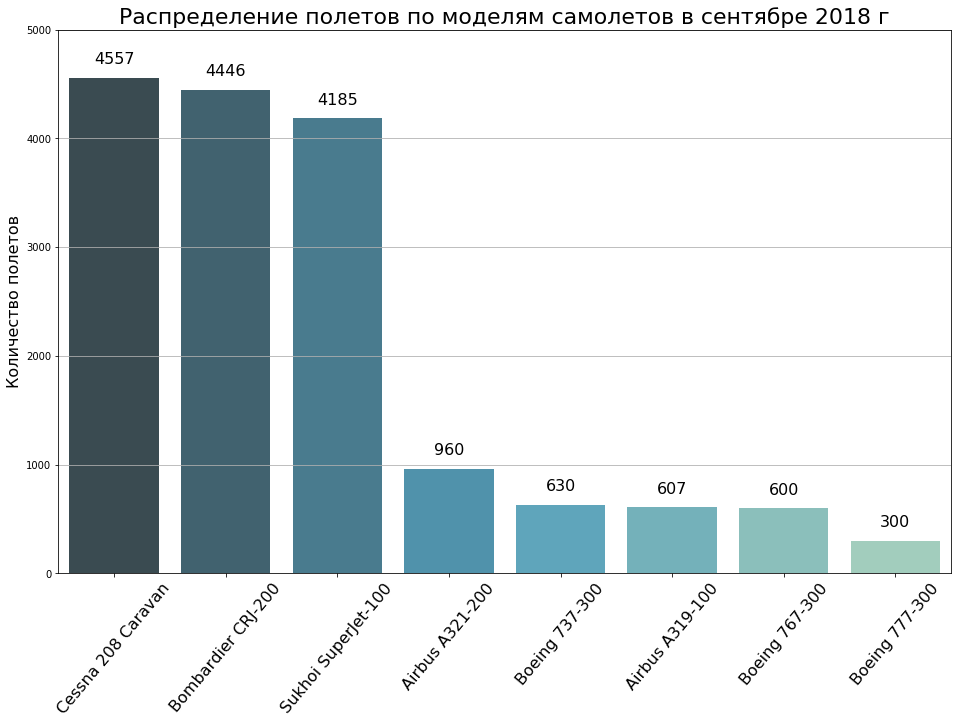

In [13]:
# создание фигуры и самого графика
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(x='model', y='flights_amount', data=aircrafts, palette='GnBu_d')

# оформление графика
ax.set_title('Распределение полетов по моделям самолетов в сентябре 2018 г', fontsize=22)
ax.set_xlabel('')
ax.set_xticklabels(aircrafts.model, rotation=50, fontsize=16)
ax.set_ylabel('Количество полетов', fontsize=16)
ax.set_ylim(0,5000)
ax.grid(axis = 'y')

# подписи значений
for row in aircrafts.itertuples():
    ax.text(row.Index, row.flights_amount+100, s=round(row.flights_amount, 0), 
            horizontalalignment= 'center', verticalalignment='bottom', fontsize=16)

### Вывод

Явно выделяются три модели самолетов, которые совершают максимальное количесвто рейсов в месяц.

Лидер по перелетам - Cessna 208, вместимость которого состалвяет всего до 13 человек. Таким образом, сразу всплывает тот факт, что количество принятых рейсов в конкретном аэропорту не является объективной метрикой для отражения масштабов авиаперевозок. Можно предположить, что такие самолеты используются на рейсах с низким пассажиропотоком, в отдаленных регионах (не исключает сочетание с первым допущением), в качестве бизнес-авиации. Однако, это всего лишь отдельная гипотеза, требующая отдельного исследования.

Bombardier CRJ200 и Sukhoi Superjet 100 с вместимостью 50 и 100 человек соответственно также выделяются на фоне остальных моделей самолетов и входят в ТОП-3 по количеству рейсов.

Далее по количеству совершаемых рейсов в месяц следуют модели самолетов с вместимостью 200+ человек.

Таким образом, сопоставив параметры вместимости и количества рейсов прослеживается тенденция к большему количеству рейсов у маломестных судов, что вглядит логичнм, но также требует более глубокого анализа.

## Количесвто перелетов по всем городам России <a id='section_4'></a>

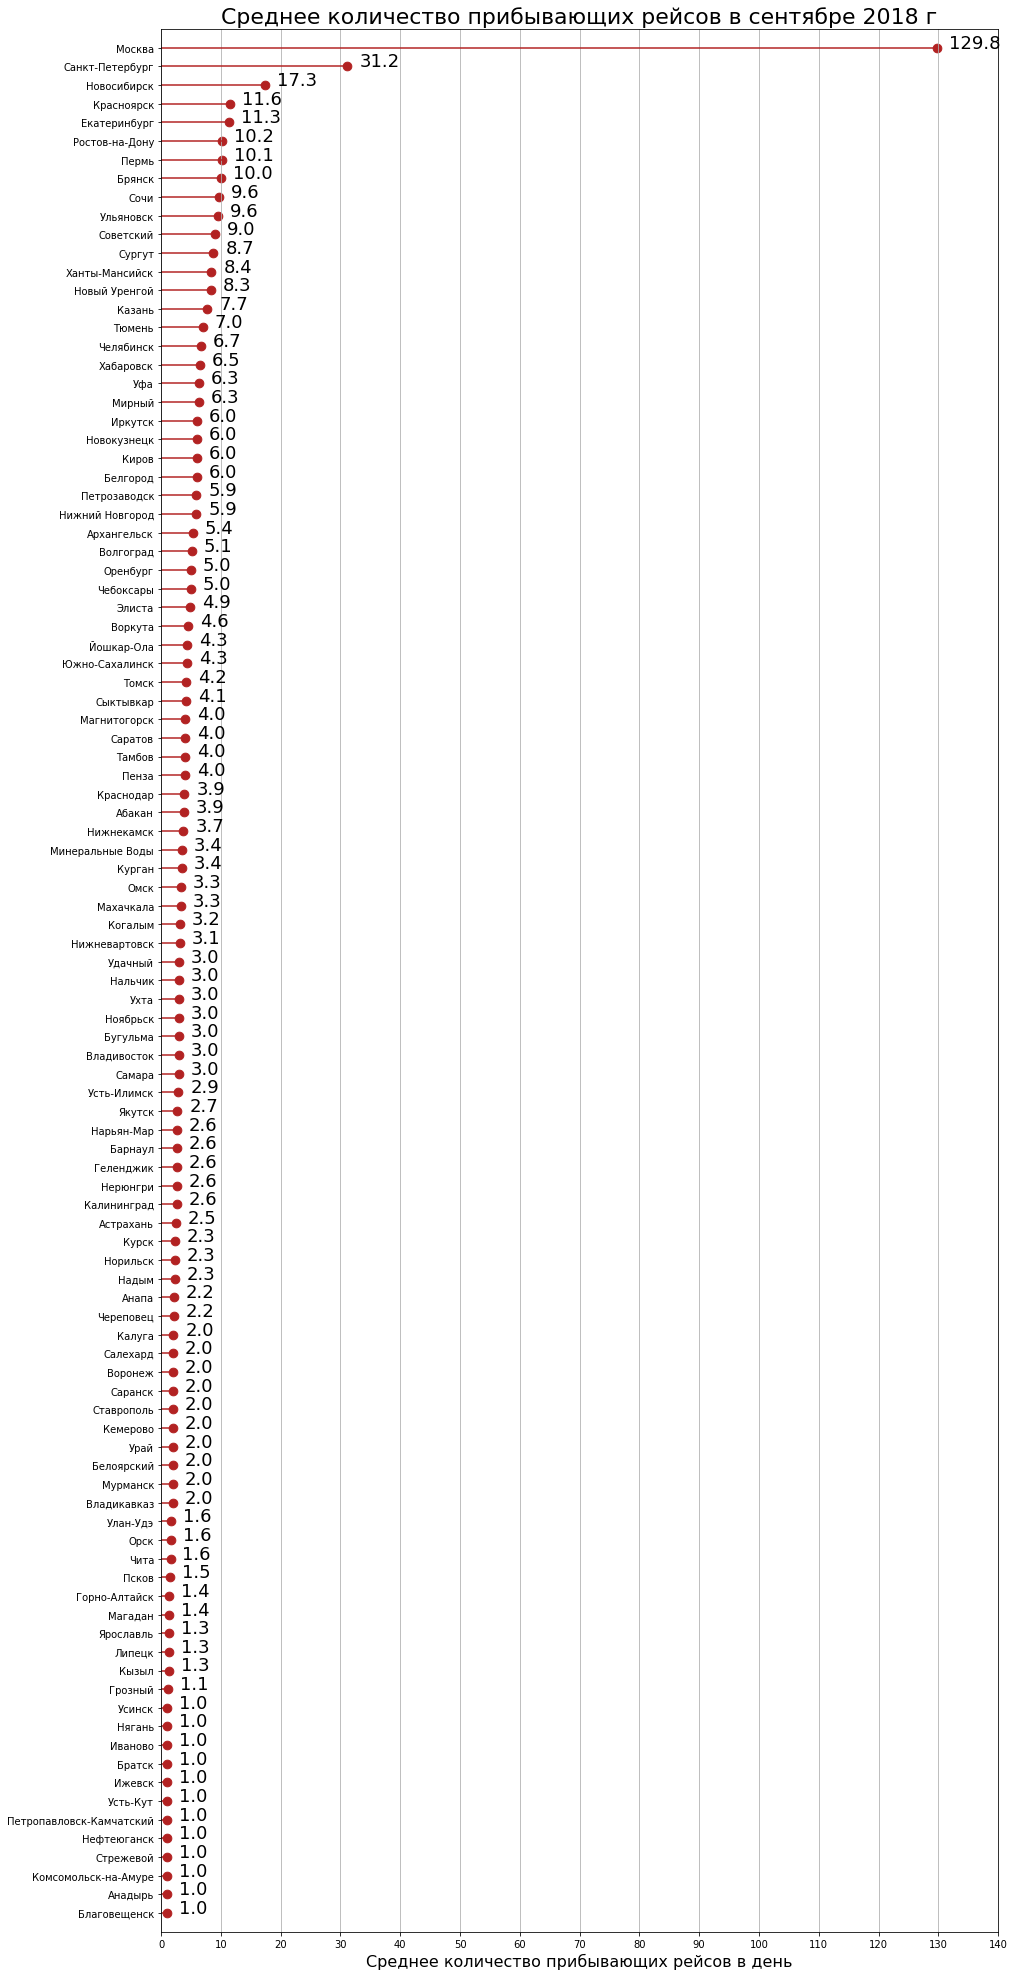

In [14]:
# создание фигуры и самого графика
fig, ax = plt.subplots(figsize=(15,35))
ax.hlines(y='city', xmin=0, xmax='average_flights', data=flights_cities, color='firebrick')
ax.scatter(y=flights_cities.city, x=flights_cities.average_flights, s=75, color='firebrick')

# оформление графика
ax.set_title('Среднее количество прибывающих рейсов в сентябре 2018 г', fontsize=22)
ax.set_xlabel('Среднее количество прибывающих рейсов в день', fontsize=16)
ax.set_xlim(0,140)
ax.set_ylim(-1,101)
ax.grid(axis = 'x')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

# подписи значений
for row in flights_cities.itertuples():
    ax.text(row.average_flights+2, row.Index, s=round(row.average_flights, 1), fontsize=18)

### Вывод
Распределение принятых рейсов в месяц по России демонстрирует, что четверть всех приянытых рейсов приходится на Москву.

При этом порядка 45% приходится на ТОП-10 городов по количеству принятых рейсов. 

Оставшиеся 55% распределены на прочие 90 городов, разрыв в количестве принятых рейсов по которым не существенный и составляет от 1 до 9 рейсов в месяц.

Следует отметить, что данное и вышеописанные суждения верны в случае, если ситуация в рассматриваемый период соответсвует ситуации в более длительные промеждутки времени.